In [14]:
!pip install seaborn

In [43]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns

In [44]:
df=pd.read_csv("Data/hotel_bookings.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [45]:
df.shape

(119390, 32)

In [46]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [47]:
def data_clean(df):
    df.fillna(0,inplace=True)
    print(df.isna().sum())
data_clean(df)
    

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [48]:
list_cols=["children","adults","babies"]
for i in list_cols:
    print(f"{i} has unique values as {df[i].unique()}")

children has unique values as [ 0.  1.  2. 10.  3.]
adults has unique values as [ 2  1  3  4 40 26 50 27 55  0 20  6  5 10]
babies has unique values as [ 0  1  2 10  9]


In [49]:
filterd_data=(df['children'] == 0) & (df['adults'] == 0) & (df['babies'] == 0)

In [50]:
final_data = df[~filterd_data]

In [51]:
final_data.shape

(119210, 32)

In [52]:
country_wise_data=final_data[final_data['is_canceled']==0]['country'].value_counts().reset_index()

country_wise_data.columns=["country","no of guests"]
print(country_wise_data)

    country  no of guests
0       PRT         20977
1       GBR          9668
2       FRA          8468
3       ESP          6383
4       DEU          6067
..      ...           ...
161     BHR             1
162     DJI             1
163     MLI             1
164     NPL             1
165     FRO             1

[166 rows x 2 columns]


In [53]:
!pip install plotly

In [54]:
import plotly.express as px

In [55]:
map_guests=px.choropleth(country_wise_data, locations = country_wise_data['country'],
                           color = country_wise_data["no of guests"],
                           hover_name = country_wise_data['country'],
                           title = "Home country of guests"
                          )
map_guests.show()

In [56]:
final_data["hotel"].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [57]:
df["adr"]

0           0.00
1           0.00
2          75.00
3          75.00
4          98.00
           ...  
119385     96.14
119386    225.43
119387    157.71
119388    104.40
119389    151.20
Name: adr, Length: 119390, dtype: float64

In [58]:
data = final_data[final_data["is_canceled"] == 0]

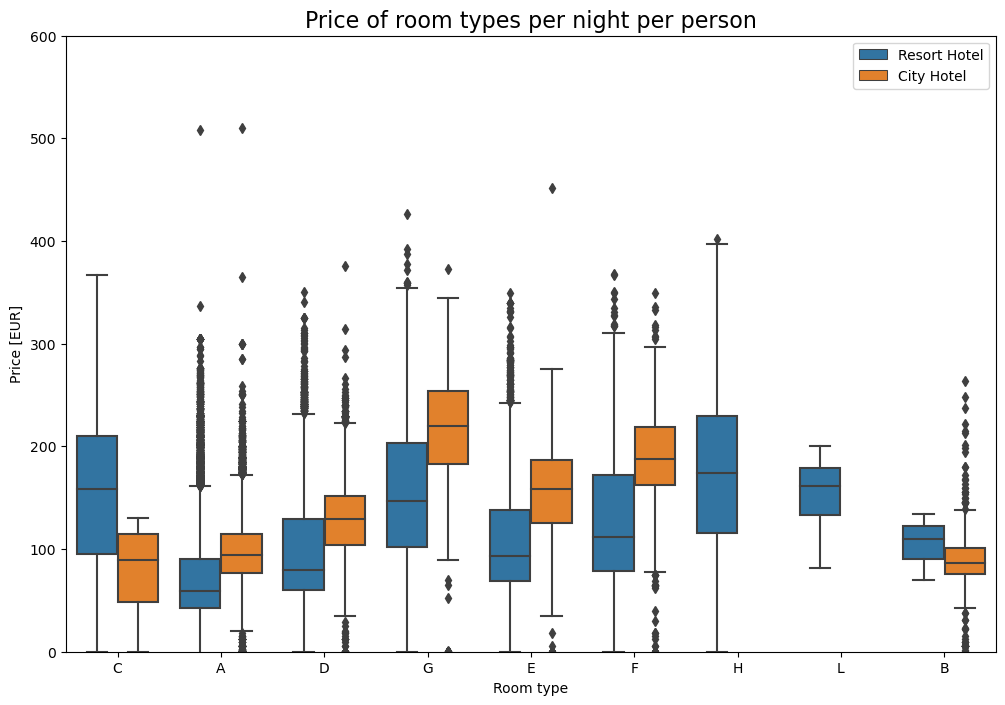

In [59]:
plt.figure(figsize = (12,8)) 

sns.boxplot(x = "reserved_room_type",
           y = "adr", 
           hue = "hotel", data = data)

plt.title("Price of room types per night per person", fontsize = 16)
plt.xlabel("Room type")
plt.ylabel("Price [EUR]")
plt.legend(loc = "upper right")
plt.ylim(0,600)
plt.show()


In [60]:
final_data["hotel"].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [61]:
data_resort = final_data[(final_data["hotel"] == "Resort Hotel") & (final_data["is_canceled"] == 0)]
data_city = final_data[(final_data["hotel"] == "City Hotel") & (final_data["is_canceled"] == 0)]

In [63]:
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel

,arrival_date_month,adr
0,April,75.867816
1,August,181.205892
2,December,68.410104
3,February,54.147478
4,January,48.761125
5,July,150.122528
6,June,107.974850
7,March,57.056838
8,May,76.657558
9,November,48.706289


In [64]:
city_hotel = data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel

,arrival_date_month,adr
0,April,111.962267
1,August,118.674598
2,December,88.401855
3,February,86.520062
4,January,82.330983
5,July,115.818019
6,June,117.874360
7,March,90.658533
8,May,120.669827
9,November,86.946592


In [66]:
final=resort_hotel.merge(city_hotel,on="arrival_date_month")
final.columns=["month","price_for_resort","price_for_city"]
final

,month,price_for_resort,price_for_city
0,April,75.867816,111.962267
1,August,181.205892,118.674598
2,December,68.410104,88.401855
3,February,54.147478,86.520062
4,January,48.761125,82.330983
5,July,150.122528,115.818019
6,June,107.974850,117.874360
7,March,57.056838,90.658533
8,May,76.657558,120.669827
9,November,48.706289,86.946592


In [68]:
from calendar import month_name

In [69]:
def sort_month(df, colname):
    month_dict = { j:i for i, j in enumerate(month_name) } 
    df["month_num"] = df[colname].apply(lambda x: month_dict[x])
    return df.sort_values(by = "month_num").reset_index().drop(['index', 'month_num'], axis = 1)

In [70]:
sort_month(final, "month")

,month,price_for_resort,price_for_city
0,January,48.761125,82.330983
1,February,54.147478,86.520062
2,March,57.056838,90.658533
3,April,75.867816,111.962267
4,May,76.657558,120.669827
5,June,107.974850,117.874360
6,July,150.122528,115.818019
7,August,181.205892,118.674598
8,September,96.416860,112.776582
9,October,61.775449,102.004672


<AxesSubplot:xlabel='month'>

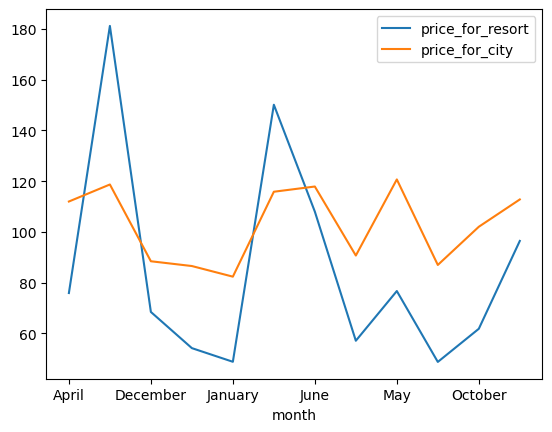

In [72]:
final.plot(kind = "line", x = "month", y = ['price_for_resort','price_for_city'])

In [79]:
rush_resort=data_resort["arrival_date_month"].value_counts().reset_index()
rush_resort.columns=["month","no of guests"]
print(rush_resort)


        month  no of guests
0      August          3257
1        July          3137
2     October          2575
3       March          2571
4       April          2550
5         May          2535
6    February          2308
7   September          2102
8        June          2037
9    December          2014
10   November          1975
11    January          1866


In [80]:
rush_city=data_city["arrival_date_month"].value_counts().reset_index()
rush_city.columns=["month","no of guests"]
print(rush_city)

        month  no of guests
0      August          5367
1        July          4770
2         May          4568
3        June          4358
4     October          4326
5   September          4283
6       March          4049
7       April          4010
8    February          3051
9    November          2676
10   December          2377
11    January          2249


In [101]:
final_rush=rush_resort.merge(rush_city,on="month")
final_rush.columns=["month","no of guests in resort","no of guests in city"]
final_rush

,month,no of guests in resort,no of guests in city
0,August,3257,5367
1,July,3137,4770
2,October,2575,4326
3,March,2571,4049
4,April,2550,4010
5,May,2535,4568
6,February,2308,3051
7,September,2102,4283
8,June,2037,4358
9,December,2014,2377


In [102]:
final_rush=sort_month(final_rush,"month")
print(final_rush)

        month  no of guests in resort  no of guests in city
0     January                    1866                  2249
1    February                    2308                  3051
2       March                    2571                  4049
3       April                    2550                  4010
4         May                    2535                  4568
5        June                    2037                  4358
6        July                    3137                  4770
7      August                    3257                  5367
8   September                    2102                  4283
9     October                    2575                  4326
10   November                    1975                  2676
11   December                    2014                  2377


<AxesSubplot:xlabel='month'>

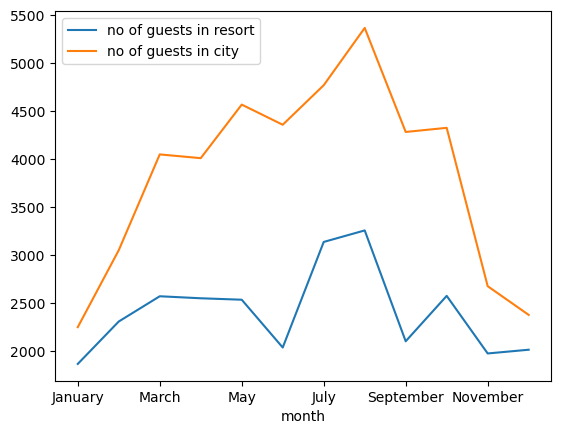

In [103]:
final_rush.plot(kind = "line", x = "month", 
                y = ['no of guests in resort','no of guests in city' ])


In [106]:
filter_condition=final_data['is_canceled'] == 0
clean_data = final_data[filter_condition]
clean_data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,9/7/2017


In [107]:
clean_data["total_nights"]=clean_data["stays_in_weekend_nights"]+clean_data["stays_in_week_nights"]

C:\Users\NEELIMA\AppData\Local\Temp\ipykernel_17516\2065437405.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [108]:
clean_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015,2


In [109]:
stay = clean_data.groupby(["total_nights", "hotel"]).agg('count').reset_index()

stay = stay.iloc[:, 0:3]
print(stay)

    total_nights         hotel  is_canceled
0              0    City Hotel          251
1              0  Resort Hotel          371
2              1    City Hotel         9155
3              1  Resort Hotel         6579
4              2    City Hotel        10983
..           ...           ...          ...
57            46  Resort Hotel            1
58            48    City Hotel            1
59            56  Resort Hotel            1
60            60  Resort Hotel            1
61            69  Resort Hotel            1

[62 rows x 3 columns]


In [111]:
stay = stay.rename(columns = {'is_canceled': 'Number of stays'})
stay

,total_nights,hotel,Number of stays
0,0,City Hotel,251
1,0,Resort Hotel,371
2,1,City Hotel,9155
3,1,Resort Hotel,6579
4,2,City Hotel,10983
...,...,...,...
57,46,Resort Hotel,1
58,48,City Hotel,1
59,56,Resort Hotel,1
60,60,Resort Hotel,1


<AxesSubplot:xlabel='total_nights', ylabel='Number of stays'>

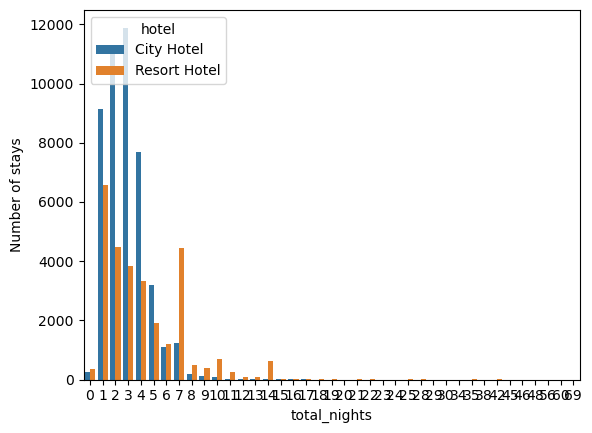

In [112]:
sns.barplot(x = "total_nights", y = "Number of stays", hue = "hotel",
           hue_order = ["City Hotel", "Resort Hotel"], data = stay)


In [113]:
correlation = final_data.corr()

In [114]:
correlation = correlation["is_canceled"][1:]

In [115]:
correlation.abs().sort_values(ascending = False)

lead_time                         0.292876
total_of_special_requests         0.234877
required_car_parking_spaces       0.195701
booking_changes                   0.144832
previous_cancellations            0.110139
is_repeated_guest                 0.083745
company                           0.083594
adults                            0.058182
previous_bookings_not_canceled    0.057365
days_in_waiting_list              0.054301
agent                             0.046770
adr                               0.046492
babies                            0.032569
stays_in_week_nights              0.025542
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
arrival_date_day_of_month         0.005948
children                          0.004851
stays_in_weekend_nights           0.001323
Name: is_canceled, dtype: float64

In [116]:
list_not = ["days_in_waiting_list", "arrival_date_year"]

In [117]:
num_features = [col for col in final_data.columns if final_data[col].dtype != "O" and col not in list_not]

In [118]:
print(num_features)

['is_canceled', 'lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


In [119]:
final_data["reservation_status"].value_counts()

Check-Out    75011
Canceled     42993
No-Show       1206
Name: reservation_status, dtype: int64

In [120]:
final_data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [121]:
cat_not = ["country", "reservation_status", "booking_changes", "assigned_room_type", "days_in_waiting_list" ]

In [122]:
cat_features = [col for col in final_data.columns 
                if final_data[col].dtype == "O" and col not in cat_not]

In [123]:
print(cat_features)

['hotel', 'arrival_date_month', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'deposit_type', 'customer_type', 'reservation_status_date']


In [124]:
print(num_features)

['is_canceled', 'lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


In [125]:
data_cat = final_data[cat_features]

In [126]:
print(data_cat.head())

          hotel arrival_date_month meal market_segment distribution_channel  \
0  Resort Hotel               July   BB         Direct               Direct   
1  Resort Hotel               July   BB         Direct               Direct   
2  Resort Hotel               July   BB         Direct               Direct   
3  Resort Hotel               July   BB      Corporate            Corporate   
4  Resort Hotel               July   BB      Online TA                TA/TO   

  reserved_room_type deposit_type customer_type reservation_status_date  
0                  C   No Deposit     Transient                7/1/2015  
1                  C   No Deposit     Transient                7/1/2015  
2                  A   No Deposit     Transient                7/2/2015  
3                  A   No Deposit     Transient                7/2/2015  
4                  A   No Deposit     Transient                7/3/2015  


In [130]:
data_cat["reservation_status_date"] = pd.to_datetime(data_cat["reservation_status_date"])

C:\Users\NEELIMA\AppData\Local\Temp\ipykernel_17516\3012104390.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [132]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")
data_cat["reservation_status_date"] = pd.to_datetime(data_cat["reservation_status_date"])

In [133]:
data_cat["reservation_status_date"]

0        2015-07-01
1        2015-07-01
2        2015-07-02
3        2015-07-02
4        2015-07-03
            ...    
119385   2017-09-06
119386   2017-09-07
119387   2017-09-07
119388   2017-09-07
119389   2017-09-07
Name: reservation_status_date, Length: 119210, dtype: datetime64[ns]

In [136]:
data_cat["year"]=data_cat["reservation_status_date"].dt.year
data_cat["month"]=data_cat["reservation_status_date"].dt.month
data_cat["day"]=data_cat["reservation_status_date"].dt.day


In [137]:
data_cat.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date,year,month,day
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01,2015,7,1
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01,2015,7,1
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,2015-07-02,2015,7,2
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,2015-07-02,2015,7,2
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,2015-07-03,2015,7,3


In [139]:
data_cat.drop("reservation_status_date" , axis=1  ,inplace=True)

In [140]:
data_cat

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,2015,7,2
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,2015,7,2
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,2015,7,3
...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,August,BB,Offline TA/TO,TA/TO,A,No Deposit,Transient,2017,9,6
119386,City Hotel,August,BB,Online TA,TA/TO,E,No Deposit,Transient,2017,9,7
119387,City Hotel,August,BB,Online TA,TA/TO,D,No Deposit,Transient,2017,9,7
119388,City Hotel,August,BB,Online TA,TA/TO,A,No Deposit,Transient,2017,9,7


In [141]:
data_cat.columns

Index(['hotel', 'arrival_date_month', 'meal', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'deposit_type',
       'customer_type', 'year', 'month', 'day'],
      dtype='object')

In [142]:
data_cat["cancellation"] = final_data["is_canceled"]

In [143]:
print(data_cat)

               hotel arrival_date_month meal market_segment  \
0       Resort Hotel               July   BB         Direct   
1       Resort Hotel               July   BB         Direct   
2       Resort Hotel               July   BB         Direct   
3       Resort Hotel               July   BB      Corporate   
4       Resort Hotel               July   BB      Online TA   
...              ...                ...  ...            ...   
119385    City Hotel             August   BB  Offline TA/TO   
119386    City Hotel             August   BB      Online TA   
119387    City Hotel             August   BB      Online TA   
119388    City Hotel             August   BB      Online TA   
119389    City Hotel             August   HB      Online TA   

       distribution_channel reserved_room_type deposit_type customer_type  \
0                    Direct                  C   No Deposit     Transient   
1                    Direct                  C   No Deposit     Transient   
2           

In [144]:
def mean_encode(df, col, mean_col):
    df_dict = df.groupby([col])[mean_col].mean().to_dict()
    df[col] = df[col].map(df_dict)
    return df

for col in data_cat.columns[0:8]:
    data_cat = mean_encode(data_cat, col, "cancellation")

In [145]:
print(data_cat)

           hotel  arrival_date_month      meal  market_segment  \
0       0.277674            0.374644  0.374106        0.153712   
1       0.277674            0.374644  0.374106        0.153712   
2       0.277674            0.374644  0.374106        0.153712   
3       0.277674            0.374644  0.374106        0.187618   
4       0.277674            0.374644  0.374106        0.367590   
...          ...                 ...       ...             ...   
119385  0.417859            0.377823  0.374106        0.343313   
119386  0.417859            0.377823  0.374106        0.367590   
119387  0.417859            0.377823  0.374106        0.367590   
119388  0.417859            0.377823  0.374106        0.367590   
119389  0.417859            0.377823  0.344653        0.367590   

        distribution_channel  reserved_room_type  deposit_type  customer_type  \
0                   0.174868            0.330827       0.28402       0.407864   
1                   0.174868            0.330

In [146]:
data_cat.drop(["cancellation"], axis = 1, inplace = True)

In [147]:
print(data_cat)

           hotel  arrival_date_month      meal  market_segment  \
0       0.277674            0.374644  0.374106        0.153712   
1       0.277674            0.374644  0.374106        0.153712   
2       0.277674            0.374644  0.374106        0.153712   
3       0.277674            0.374644  0.374106        0.187618   
4       0.277674            0.374644  0.374106        0.367590   
...          ...                 ...       ...             ...   
119385  0.417859            0.377823  0.374106        0.343313   
119386  0.417859            0.377823  0.374106        0.367590   
119387  0.417859            0.377823  0.374106        0.367590   
119388  0.417859            0.377823  0.374106        0.367590   
119389  0.417859            0.377823  0.344653        0.367590   

        distribution_channel  reserved_room_type  deposit_type  customer_type  \
0                   0.174868            0.330827       0.28402       0.407864   
1                   0.174868            0.330

In [148]:
num_data = final_data[num_features]
cat_data=data_cat
dataframe = pd.concat([num_data, cat_data], axis = 1)

In [150]:
dataframe

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,0,342,27,1,0,0,2,0.0,0,0,...,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,1
1,0,737,27,1,0,0,2,0.0,0,0,...,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,1
2,0,7,27,1,0,1,1,0.0,0,0,...,0.374644,0.374106,0.153712,0.174868,0.391567,0.28402,0.407864,2015,7,2
3,0,13,27,1,0,1,1,0.0,0,0,...,0.374644,0.374106,0.187618,0.220568,0.391567,0.28402,0.407864,2015,7,2
4,0,14,27,1,0,2,2,0.0,0,0,...,0.374644,0.374106,0.367590,0.410598,0.391567,0.28402,0.407864,2015,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,35,30,2,5,2,0.0,0,0,...,0.377823,0.374106,0.343313,0.410598,0.391567,0.28402,0.407864,2017,9,6
119386,0,102,35,31,2,5,3,0.0,0,0,...,0.377823,0.374106,0.367590,0.410598,0.292683,0.28402,0.407864,2017,9,7
119387,0,34,35,31,2,5,2,0.0,0,0,...,0.377823,0.374106,0.367590,0.410598,0.318108,0.28402,0.407864,2017,9,7
119388,0,109,35,31,2,5,2,0.0,0,0,...,0.377823,0.374106,0.367590,0.410598,0.391567,0.28402,0.407864,2017,9,7


In [151]:
dataframe.describe()

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
count,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,...,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000
mean,0.370766,104.109227,27.163376,15.798717,0.927053,2.499195,1.859206,0.104043,0.007961,0.031499,...,0.370766,0.370766,0.370766,0.370766,0.370766,0.370766,0.370766,2016.093549,6.333630,15.666278
std,0.483012,106.875450,13.601107,8.781070,0.995117,1.897106,0.575186,0.398836,0.097509,0.174663,...,0.033756,0.024433,0.128967,0.085574,0.035148,0.232585,0.065988,0.715306,3.345818,8.778871
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.305016,0.244654,0.122253,0.174868,0.292683,0.222222,0.101045,2014.000000,1.000000,1.000000
25%,0.000000,18.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,...,0.334451,0.374106,0.343313,0.410598,0.330827,0.284020,0.407864,2016.000000,3.000000,8.000000
50%,0.000000,69.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,...,0.377823,0.374106,0.367590,0.410598,0.391567,0.284020,0.407864,2016.000000,6.000000,16.000000
75%,1.000000,161.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,...,0.397029,0.374106,0.367590,0.410598,0.391567,0.284020,0.407864,2017.000000,9.000000,23.000000
max,1.000000,737.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,...,0.414860,0.598997,1.000000,0.800000,0.407654,0.993624,0.407864,2017.000000,12.000000,31.000000


<AxesSubplot:xlabel='lead_time', ylabel='Density'>

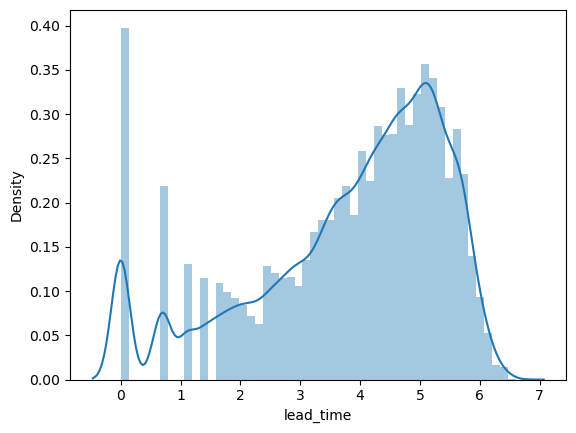

In [157]:
sns.distplot(dataframe['lead_time'])

In [153]:
def handle_outlier(col):
    dataframe[col] = np.log1p(dataframe[col])

In [154]:
handle_outlier("lead_time")

<AxesSubplot:xlabel='lead_time', ylabel='Density'>

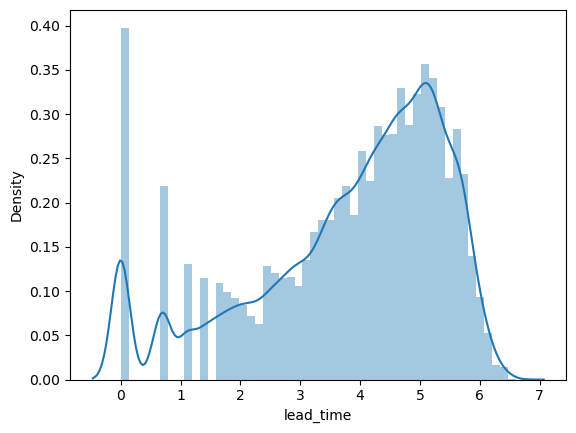

In [156]:
sns.distplot(dataframe["lead_time"].dropna())

<AxesSubplot:xlabel='adr', ylabel='Density'>

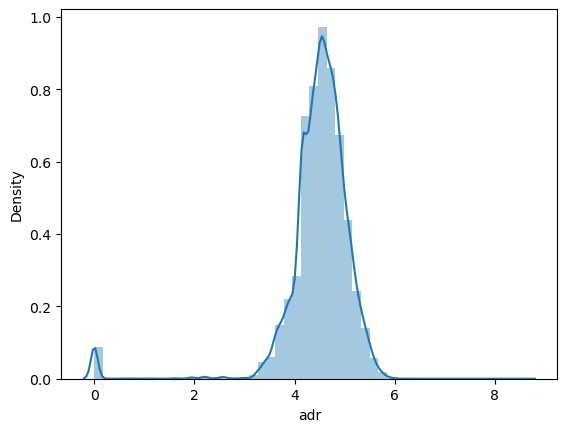

In [160]:
sns.distplot(dataframe["adr"])

In [161]:
handle_outlier("adr")

In [164]:
dataframe.isnull().sum()

is_canceled                       0
lead_time                         0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
agent                             0
company                           0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
hotel                             0
arrival_date_month                0
meal                              0
market_segment                    0
distribution_channel              0
reserved_room_type                0
deposit_type                      0
customer_type                     0
year                              0
month                       

In [163]:
dataframe.dropna(inplace = True)

In [168]:
y = dataframe["is_canceled"]
y
x=dataframe.drop("is_canceled",axis=1)
x

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,...,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,5.837730,27,1,0,0,2,0.0,0,0,0,...,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,1
1,6.603944,27,1,0,0,2,0.0,0,0,0,...,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,1
2,2.079442,27,1,0,1,1,0.0,0,0,0,...,0.374644,0.374106,0.153712,0.174868,0.391567,0.28402,0.407864,2015,7,2
3,2.639057,27,1,0,1,1,0.0,0,0,0,...,0.374644,0.374106,0.187618,0.220568,0.391567,0.28402,0.407864,2015,7,2
4,2.708050,27,1,0,2,2,0.0,0,0,0,...,0.374644,0.374106,0.367590,0.410598,0.391567,0.28402,0.407864,2015,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,3.178054,35,30,2,5,2,0.0,0,0,0,...,0.377823,0.374106,0.343313,0.410598,0.391567,0.28402,0.407864,2017,9,6
119386,4.634729,35,31,2,5,3,0.0,0,0,0,...,0.377823,0.374106,0.367590,0.410598,0.292683,0.28402,0.407864,2017,9,7
119387,3.555348,35,31,2,5,2,0.0,0,0,0,...,0.377823,0.374106,0.367590,0.410598,0.318108,0.28402,0.407864,2017,9,7
119388,4.700480,35,31,2,5,2,0.0,0,0,0,...,0.377823,0.374106,0.367590,0.410598,0.391567,0.28402,0.407864,2017,9,7


In [169]:
x.head()


0    0
1    0
2    0
3    0
4    0
Name: is_canceled, dtype: int64

In [170]:
x.head()

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,...,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,5.837730,27,1,0,0,2,0.0,0,0,0,...,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,1
1,6.603944,27,1,0,0,2,0.0,0,0,0,...,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,1
2,2.079442,27,1,0,1,1,0.0,0,0,0,...,0.374644,0.374106,0.153712,0.174868,0.391567,0.28402,0.407864,2015,7,2
3,2.639057,27,1,0,1,1,0.0,0,0,0,...,0.374644,0.374106,0.187618,0.220568,0.391567,0.28402,0.407864,2015,7,2
4,2.708050,27,1,0,2,2,0.0,0,0,0,...,0.374644,0.374106,0.367590,0.410598,0.391567,0.28402,0.407864,2015,7,3


In [171]:
x.columns

Index(['lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'adr', 'required_car_parking_spaces', 'total_of_special_requests',
       'hotel', 'arrival_date_month', 'meal', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'deposit_type',
       'customer_type', 'year', 'month', 'day'],
      dtype='object')

In [172]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [173]:
feature_sel_model = SelectFromModel(Lasso(alpha = 0.005, random_state = 0))

In [175]:
feature_sel_model.fit(x, y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [176]:
feature_sel_model.get_support()

array([ True,  True, False, False,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False,  True, False,  True,  True,
        True])

In [177]:
cols = x.columns
print(cols)

Index(['lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'adr', 'required_car_parking_spaces', 'total_of_special_requests',
       'hotel', 'arrival_date_month', 'meal', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'deposit_type',
       'customer_type', 'year', 'month', 'day'],
      dtype='object')


In [178]:
selected_feature = cols[(feature_sel_model.get_support())]

In [179]:
print(selected_feature)

Index(['lead_time', 'arrival_date_week_number', 'stays_in_week_nights',
       'adults', 'children', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'adr', 'required_car_parking_spaces', 'total_of_special_requests',
       'deposit_type', 'year', 'month', 'day'],
      dtype='object')


In [181]:
print(f"Total features {x.shape[1]}")

Total features 28


In [182]:
print(f"Selected features {len(selected_feature)}")

Selected features 17


In [183]:
x.columns

Index(['lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'adr', 'required_car_parking_spaces', 'total_of_special_requests',
       'hotel', 'arrival_date_month', 'meal', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'deposit_type',
       'customer_type', 'year', 'month', 'day'],
      dtype='object')

In [184]:
x=x[selected_feature]

In [185]:
x.columns

Index(['lead_time', 'arrival_date_week_number', 'stays_in_week_nights',
       'adults', 'children', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'adr', 'required_car_parking_spaces', 'total_of_special_requests',
       'deposit_type', 'year', 'month', 'day'],
      dtype='object')

In [186]:
x.head()

,lead_time,arrival_date_week_number,stays_in_week_nights,adults,children,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,adr,required_car_parking_spaces,total_of_special_requests,deposit_type,year,month,day
0,5.837730,27,0,2,0.0,0,0,3,0.0,0.0,0.000000,0,0,0.28402,2015,7,1
1,6.603944,27,0,2,0.0,0,0,4,0.0,0.0,0.000000,0,0,0.28402,2015,7,1
2,2.079442,27,1,1,0.0,0,0,0,0.0,0.0,1.673489,0,0,0.28402,2015,7,2
3,2.639057,27,1,1,0.0,0,0,0,304.0,0.0,1.673489,0,0,0.28402,2015,7,2
4,2.708050,27,2,2,0.0,0,0,0,240.0,0.0,1.721895,0,1,0.28402,2015,7,3


In [187]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_canceled, dtype: int64

In [189]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75,random_state=45)

In [190]:
from sklearn.linear_model import LogisticRegression
logistic_model=LogisticRegression()
logistic_model.fit(x_train,y_train)

LogisticRegression()

In [194]:
y_pred=logistic_model.predict(x_test)

In [193]:
from sklearn.metrics import confusion_matrix

In [195]:
confusion_matrix(y_test,y_pred)

array([[15314,  3368],
       [ 5332,  5789]], dtype=int64)

In [196]:
from sklearn.metrics import accuracy_score

In [197]:
accuracy_score(y_test,y_pred)

0.708083078884676

In [201]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [207]:
models=[]
models.append(("Naive Bayes", GaussianNB()))
models.append(("Random Forest",  RandomForestClassifier()))
models.append(("Decision Tree" ,DecisionTreeClassifier()))
models.append(("KNN", KNeighborsClassifier(n_neighbors=5)))

In [208]:
for name, model in models:
    print(name)
    model.fit(x_train, y_train)
    
    predictions = model.predict(x_test)
    
   
    from sklearn.metrics import confusion_matrix
    print(confusion_matrix(predictions, y_test))
    
    from sklearn.metrics import accuracy_score
    print(accuracy_score(predictions, y_test))
    
    print("\n")

Naive Bayes
[[ 7814  1018]
 [10868 10103]]
0.6011810891520988


Random Forest
[[18540  1321]
 [  142  9800]]
0.9509109821158944


Decision Tree
[[17851   820]
 [  831 10301]]
0.9446028923262759


KNN
[[18373  1973]
 [  309  9148]]
0.9234305271281414


